In [14]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')
df=pd.read_csv(r'C:\Users\SAYAN ROY\Downloads\student\student-mat.csv',header=None)
parsed_data = df.iloc[0, 0].split(';')

columns = [col.strip() for col in parsed_data]
data = [row.split(';') for row in df.iloc[1:, 0]]
df = pd.DataFrame(data=data,columns=columns)
df['G1']=df['G1'].str.strip('""').astype(int)
df['G2']=df['G2'].str.strip('""').astype(int)


In [15]:

#cols_to_check=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']
X_vars=['Fedu','traveltime','studytime','failures','famrel',\
        'address','Mjob','guardian','nursery','goout','Dalc'\
        ,'Walc','absences','G1','G2']

cols_to_int=['Fedu','traveltime','studytime','failures','famrel'\
               ,'goout','Dalc','Walc','absences','G1','G2']
cols_to_scale=['absences','G1','G2']
X=pd.DataFrame(data=df,columns=X_vars)
y=df['G3'].astype(int)

categoricals=['address','Mjob','guardian','nursery']

for i in cols_to_int:
    if not X[i].dtype == int:
        X[i]=X[i].astype(int)

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
for i in categoricals:
    X[i]=X[i].str.strip('""')
    le=LabelEncoder()
    X[i]=le.fit_transform(X[i])

sc=StandardScaler()
X[cols_to_scale]=sc.fit_transform(X[cols_to_scale])
X.head()


,Fedu,traveltime,studytime,failures,famrel,address,Mjob,guardian,nursery,goout,Dalc,Walc,absences,G1,G2
0,4,2,2,0,4,1,0,1,1,4,1,1,0.036424,-1.782467,-1.254791
1,1,1,2,0,5,1,0,0,0,3,1,1,-0.213796,-1.782467,-1.520979
2,1,1,2,3,4,1,0,1,1,2,2,3,0.536865,-1.179147,-0.722415
3,2,1,3,0,3,1,1,1,1,2,1,1,-0.464016,1.234133,0.874715
4,3,1,2,0,4,1,2,0,1,2,1,2,-0.213796,-1.480807,-0.190038


In [16]:

from sklearn.feature_selection import mutual_info_regression
mi=mutual_info_regression(X,y,random_state=2)
mi=pd.Series(mi,name='MI scores',index=X.columns)
mi=mi.sort_values(ascending=False)
print(mi)


G2            1.318120
G1            0.855885
absences      0.142532
failures      0.107746
Mjob          0.070853
Walc          0.047660
goout         0.007423
famrel        0.006236
guardian      0.005875
address       0.004677
Dalc          0.001031
Fedu          0.000000
traveltime    0.000000
studytime     0.000000
nursery       0.000000
Name: MI scores, dtype: float64


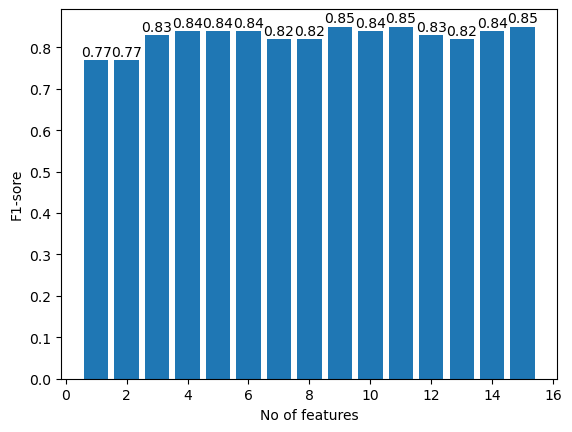

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train1,X_test1,y_train1,y_test1=X_train.copy(),X_test.copy(),y_train.copy(),y_test.copy()


from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,criterion='squared_error',random_state=2)
f1_score_list=[]
for i in range(1,len(X.columns)+1):
    selector=SelectKBest(mutual_info_regression,k=i)
    selector.fit(X_train1,y_train1)
    sel_X_train=selector.transform(X_train1)
    sel_X_test=selector.transform(X_test1)
    model.fit(sel_X_train,y_train1)
    y_pred=model.predict(sel_X_test)
    f1_kbest=round(r2_score(y_test1,y_pred),2)
    f1_score_list.append(f1_kbest)

# y1=X.var(axis=0)

fig,ax=plt.subplots()
plt.bar(range(1,len(f1_score_list)+1),f1_score_list,align='center')
plt.xlabel('No of features')
plt.ylabel('F1-sore')

for ind,val in enumerate(f1_score_list):
    plt.text(x=ind+1,y=val+0.01,s=str(val),ha='center')
plt.show()

#obtained from kbest--'studytime', 'failures', 'famrel', 'address', 'Mjob', 'guardian','nursery', 'goout', 'Dalc', 'Walc', 'absences', 'G1', 'G2


In [18]:
#getting the features
mask=selector.get_support()
features=X_train1.columns[mask]
print(features)

Index(['Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'address',
       'Mjob', 'guardian', 'nursery', 'goout', 'Dalc', 'Walc', 'absences',
       'G1', 'G2'],
      dtype='object')


In [36]:
# applying decision tree regression to get predicted result
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#model=DecisionTreeRegressor(criterion='squared_error',max_depth=5,min_samples_leaf=4,random_state=2)
model=RandomForestRegressor(n_estimators=20,max_depth=5,min_samples_leaf=4)
#model=SVR(kernel='linear',C=0.084)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import r2_score
print('R2 score: %.4f'%r2_score(y_test,y_pred))

from sklearn.model_selection import cross_val_score
accr=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
print('Mean score from cross validation: %.4f'%accr.mean())



R2 score: 0.8334
Mean score from cross validation: 0.8771
